Name: Maitri Shah
ML Intern - June Self-Paced Batch

MINOR Project - MNIST Digit Classification Machine Learning Project

Instructions:
The MNIST digit classification python project enables machines to recognize handwritten digits.

Made using Logistic regresion Algorithm - 92.5% Accuracy

In [13]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# from sklearn import datasets
# from sklearn.datasets import load_digits
# mn = load_digits()


In [2]:
# x = mn.data
# y = mn.target

# x.shape
# y.shape

MNIST ON TRAIN DATASET

In [3]:
df = pd.read_csv(r"mnist_train.csv")

In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 785)

In [6]:
#Splitting dataset to training and test

y = df['label']
df.drop('label', inplace=True, axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(df,y, test_size = 0.166677, random_state = 0)  

In [7]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(49999, 784) (49999,)
(10001, 784) (10001,)


In [8]:
print(np.unique(ytrain, return_counts=True))
print(np.unique(ytest, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([4922, 5589, 4985, 5146, 4898, 4530, 4900, 5224, 4869, 4936],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1001, 1153,  973,  985,  944,  891, 1018, 1041,  982, 1013],
      dtype=int64))


In [9]:
# test data
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
accuracy = accuracy_score(ytest, ypred)    #Evaluating performance of model
print('Accuracy: ', accuracy)

Accuracy:  0.9251074892510749


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

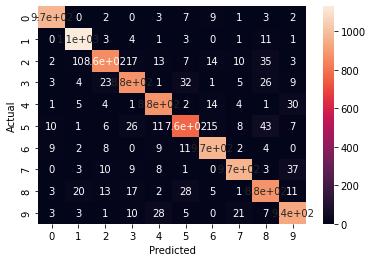

In [11]:
#Confusion matrix
#Using Pandas crosstab and seaborn library

confusion_matrix = pd.crosstab(ytest, ypred, rownames = ['Actual'], colnames = ['Predicted'])

sns.heatmap(confusion_matrix, annot = True)

In [14]:
c = confusion_matrix(ytest, ypred)
print('The confusion Matrix: ', c)

The confusion Matrix:  [[ 974    0    2    0    3    7    9    1    3    2]
 [   0 1129    3    4    1    3    0    1   11    1]
 [   2   10  862   17   13    7   14   10   35    3]
 [   3    4   23  881    1   32    1    5   26    9]
 [   1    5    4    1  882    2   14    4    1   30]
 [  10    1    6   26   11  764   15    8   43    7]
 [   9    2    8    0    9   11  973    2    4    0]
 [   0    3   10    9    8    1    0  970    3   37]
 [   3   20   13   17    2   28    5    1  882   11]
 [   3    3    1   10   28    5    0   21    7  935]]


In [15]:
score = precision_recall_fscore_support(ytest, ypred)
print('Precision, Recall, Fscore :', score)

Precision, Recall, Fscore : (array([0.96915423, 0.95921835, 0.9248927 , 0.91295337, 0.92066806,
       0.88837209, 0.94374394, 0.94819159, 0.86896552, 0.90338164]), array([0.97302697, 0.97918474, 0.88591984, 0.89441624, 0.93432203,
       0.85746352, 0.95579568, 0.93179635, 0.89816701, 0.92300099]), array([0.97108674, 0.96909871, 0.90498688, 0.90358974, 0.92744479,
       0.8726442 , 0.94973158, 0.93992248, 0.88332499, 0.91308594]), array([1001, 1153,  973,  985,  944,  891, 1018, 1041,  982, 1013],
      dtype=int64))


MNIST on TEST DATASET

In [16]:
df2 = pd.read_csv(r"mnist_test.csv")

In [17]:
df2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df2.shape

(10000, 785)

In [19]:
df2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df2.drop('label', inplace=True, axis=1)

In [21]:
df2.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
ypred = model.predict(df2)

In [23]:
print(ypred)

[7 2 1 ... 4 5 6]


In [24]:
data = np.matrix(df2)

The number is:  0



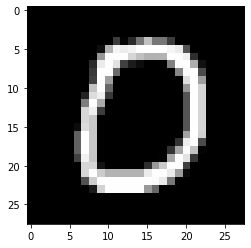

In [25]:

index = 10  #index of Image and answer  ----------  Changing the index ypu will get different number images and the correct classification answer
img = data[index].reshape(28,28)

# And displaying the image
plt.imshow(img, cmap="gray")
print('The number is: ', ypred[index])
print()